Task 1: Спрогнозировать производительность суперкомпьютера в 2025г. (на основании рейтинга top500.org)

In [136]:
import pandas
import numpy
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [137]:
data_ = pandas.read_excel('./TOP500_202206.xlsx')

In [138]:
data = data_[[
      'Year',
      'Rmax [TFlop/s]',
]]

In [139]:
data = data.groupby(by=['Year'], as_index=False, observed=True).max('Rmax [TFlop/s]')

In [140]:
data

,Year,Rmax [TFlop/s]
0,2010,2.566000e+03
1,2011,1.653920e+03
2,2013,5.283110e+03
3,2014,3.577000e+03
4,2015,5.536990e+03
5,2016,9.301459e+04
6,2017,2.123000e+04
7,2018,1.486000e+05
8,2019,2.351640e+04
9,2020,4.420100e+05


<AxesSubplot:xlabel='Year', ylabel='Rmax [TFlop/s]'>

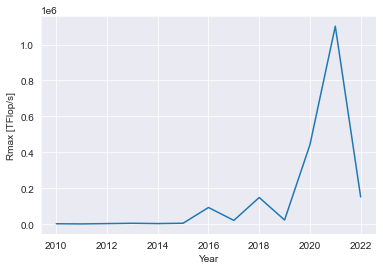

In [141]:
sns.lineplot(data=data, x="Year", y="Rmax [TFlop/s]")

In [142]:
y = data['Rmax [TFlop/s]']
y = numpy.array(y).reshape(-1, 1)
# x = data.loc[:, data.columns != 'Rmax [TFlop/s]']
x = data['Year']
x = numpy.array(x).reshape(-1, 1)

In [143]:
model = LinearRegression().fit(x, y)

In [144]:
x_test = numpy.array([2025]).reshape(-1, 1)
y_pred = model.predict(x_test)

In [145]:
y_pred

array([[580385.43670264]])

С помощью обычной линейной регрессии и данных за июнь 2022 г: приблизительное максимальное значение TFlop/s супер-компьютера в 2025г - 580385.436703

---

Task 2: Оценить какой процент всего производимого электричества на Земле потребляют все суперкомпьютеры из top500.org

In [160]:
# Потраченная мощность, если бы супер-компьютеры работали 24/7 целый год
sc_power = data_['Power (kW)'].sum() * 8760

# Значение вырабатываемой электроэнергии в год https://ru.wikipedia.org/wiki/Список_стран_по_производству_электроэнергии
word_power = 26889.2 * 1000000  # Перевод ТВт -> кВт

res = int(sc_power / word_power * 100)

In [161]:
res

11

Потребление электроэнергии суперкомпьютерами за год составило бы 11% от всей вырабатываемой электроэнергии в мире. (при условии, что суперкомпьютеры бы работали 24/7 целый год)